# Global AI Job Market & Salary Trends 2025

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn: Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import joblib


## Table of Contents
1. [Data Loading](#data-loading)
2. [Data Cleaning](#data-cleaning)
3. [Data Processing](#data-processing)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Data Modeling](#data-modeling)

## Data Loading

Load **Global AI Job Market & Salary Trends 2025** from csv file named `ai_job_dataset.csv` and show top 10 rows.

In [3]:
data = pd.read_csv('ai_job_dataset.csv') # load dataset
data.head(10) # display first 10 rows of dataset


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [4]:
data.tail(5)


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics
14999,AI15000,Computer Vision Engineer,56481,USD,MI,PT,Austria,S,Austria,50,"Scala, Azure, Deep Learning, GCP, Mathematics",PhD,2,Technology,2024-07-18,2024-08-10,2492,7.6,AI Innovations


## Analysis dataset
After loading the dataset, let's perform the following analysis.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [6]:
data.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


**จาก `data.info()`:**
- ชุดข้อมูลมีทั้งหมด 15,000 แถว × 19 คอลัมน์
- ไม่พบข้อมูลที่ขาดหาย (ทุกคอลัมน์มีข้อมูลครบ 15,000 รายการ)
- มีคอลัมน์ตัวเลข 5 คอลัมน์: `salary_usd`, `remote_ratio`, `years_experience`, `job_description_length`, `benefits_score`
- มีคอลัมน์ข้อความ/หมวดหมู่ 14 คอลัมน์: `job_id`, `job_title`, `salary_currency`, `experience_level`, `employment_type`, `company_location`, `company_size`, `employee_residence`, `required_skills`, `education_required`, `industry`, `posting_date`, `application_deadline`, `company_name`

**จาก `data.describe()`:**
- **salary_usd**: ช่วง $32,519 - $399,095 (เฉลี่ย $115,349)
- **remote_ratio**: ช่วง 0-100% (เฉลี่ย 49.5%) - งานส่วนใหญ่เป็นแบบ hybrid
- **years_experience**: ช่วง 0-19 ปี (เฉลี่ย 6.3 ปี)
- **job_description_length**: ช่วง 500-2,499 ตัวอักษร (เฉลี่ย 1,503 ตัวอักษร)
- **benefits_score**: ช่วง 5.0-10.0 (เฉลี่ย 7.5)

## Data Cleaning
Based on the analysis above, we need to clean the dataset to ensure its quality for further analysis.

In [7]:
#check missing values
data.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [8]:
# Convert date columns to datetime format
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['application_deadline'] = pd.to_datetime(data['application_deadline'])
print("posting_date type:", data['posting_date'].dtype)
print("application_deadline type:", data['application_deadline'].dtype)

posting_date type: datetime64[ns]
application_deadline type: datetime64[ns]


In [9]:
# Check for duplicated rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [10]:
# Reset index after cleaning
data = data.reset_index(drop=True)
print(f"Dataset shape after cleaning: {data.shape}")
print(f"Total rows: {len(data):,}")
print(f"Total columns: {len(data.columns)}")
data.head()

Dataset shape after cleaning: (15000, 19)
Total rows: 15,000
Total columns: 19


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


**หลังจากทำการ clean dataset สรุปได้ว่า:**
- ไม่พบข้อมูลที่ขาดหายในทุกคอลัมน์ ทุกคอลัมน์มีข้อมูลครบถ้วน 15,000 รายการ
- แปลงคอลัมน์ `posting_date` และ `application_deadline` จาก object เป็น datetime64 เรียบร้อยแล้ว ช่วยให้สามารถวิเคราะห์ข้อมูลตามช่วงเวลาได้อย่างถูกต้อง
- ไม่พบข้อมูลซ้ำในชุดข้อมูล จำนวนแถวยังคงเป็น 15,000 แถวเหมือนเดิม
- ไม่มีค่า null
สรุปได้ว่าหลังจากทำการ Data Cleaning ชุดข้อมูล มี 15,000 แถว × 19 คอลัมน์ ได้ทำการ reset ให้เรียงลำดับใหม่ (0 ถึง 14,999)


## Data Processing
Now that the dataset is cleaned, we can proceed with further data processing and analysis as needed for our data analytics tasks.

#### Distribution of Application Period (days_to_apply)

In [11]:
# Create new time-based columns from the 'posting_date' column
data['posting_year'] = data['posting_date'].dt.year
data['posting_month'] = data['posting_date'].dt.month
data['posting_day'] = data['posting_date'].dt.day
data['posting_dayofweek'] = data['posting_date'].dt.dayofweek  # 0=Monday, 6=Sunday
data['posting_quarter'] = data['posting_date'].dt.quarter  # Divide the year into 4 quarters (Q1–Q4)
# show table of the new time-based columns
data[['posting_year', 'posting_month', 'posting_day', 'posting_dayofweek', 'posting_quarter']].head(10)

,posting_year,posting_month,posting_day,posting_dayofweek,posting_quarter
0,2024,10,18,4,4
1,2024,11,20,2,4
2,2025,3,18,1,1
3,2024,12,23,0,4
4,2025,4,15,1,2
5,2024,8,31,5,3
6,2024,12,29,6,4
7,2024,6,7,4,2
8,2024,11,4,0,4
9,2024,10,20,6,4


In [12]:
# Calculate the number of days between 'posting_date' and 'application_deadline'
data['days_to_apply'] = (data['application_deadline'] - data['posting_date']).dt.days
data[['days_to_apply']].head(10)


,days_to_apply
0,20
1,52
2,20
3,63
4,69
5,34
6,61
7,24
8,20
9,17


In [13]:
# Descriptive Statistics days_to_apply 
data[['days_to_apply']].describe()

,days_to_apply
count,15000.000000
mean,43.546200
std,17.325134
min,14.000000
25%,29.000000
50%,44.000000
75%,59.000000
max,74.000000


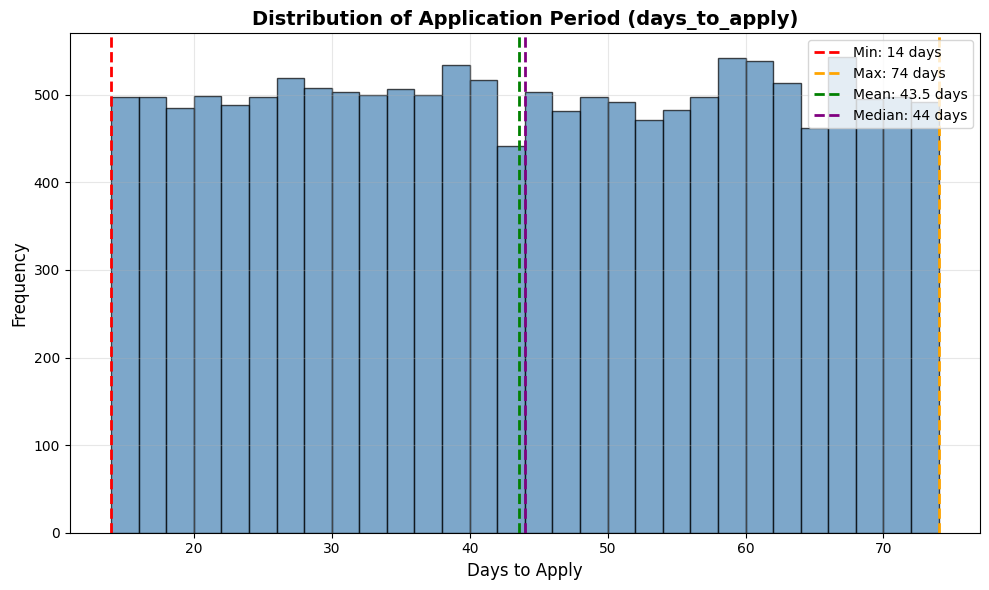

In [14]:
plt.figure(figsize=(10, 6))

# Plot histogram of 'days_to_apply'
plt.hist(data['days_to_apply'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')

# Add reference lines for key statistics
plt.axvline(data['days_to_apply'].min(), color='red', linestyle='--', linewidth=2, 
            label=f'Min: {data["days_to_apply"].min():.0f} days')
plt.axvline(data['days_to_apply'].max(), color='orange', linestyle='--', linewidth=2, 
            label=f'Max: {data["days_to_apply"].max():.0f} days')
plt.axvline(data['days_to_apply'].mean(), color='green', linestyle='--', linewidth=2, 
            label=f'Mean: {data["days_to_apply"].mean():.1f} days')
plt.axvline(data['days_to_apply'].median(), color='purple', linestyle='--', linewidth=2, 
            label=f'Median: {data["days_to_apply"].median():.0f} days')

plt.xlabel('Days to Apply', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Application Period (days_to_apply)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()



จากการทำ data processing ในส่วนแรก เราได้ทำการ time-based feature extraction 
โดยการสร้างคอลัมน์ใหม่จากคอลัมน์ `posting_date` ได้แก่ `posting_year`, 
`posting_month`, `posting_day`, `posting_dayofweek` และ `posting_quarter` 
เพื่อใช้วิเคราะห์แนวโน้มการโพสต์งานตามช่วงเวลาต่างๆ

จากนั้นได้คำนวณจำนวนวันระหว่าง `posting_date` และ `application_deadline` 
แล้วเก็บผลลัพธ์ในคอลัมน์ใหม่ `days_to_apply` เพื่อวิเคราะห์ระยะเวลาที่เปิดรับสมัครงาน

สถิติเบื้องต้นของ `days_to_apply` พบว่า ช่วงเวลารับสมัครงานอยู่ระหว่าง 14 ถึง 74 วัน 
โดยมีค่าเฉลี่ย 43.5 วัน ค่ากลาง 44 วัน ส่วนเบี่ยงเบนมาตรฐาน 17.3 วัน

In [15]:
data[['remote_ratio']]

,remote_ratio
0,50
1,100
2,0
3,50
4,100
...,...
14995,50
14996,0
14997,50
14998,0


#### Work Type Distribution (Categorized from remote_ratio)

In [16]:
# Categorize job types based on the 'remote_ratio' column
# 0   → On-site (work at the office)
# 100 → Fully Remote (work from anywhere)
# else → Hybrid (partly remote, partly on-site)

def categorize_remote(ratio):
    if ratio == 0:
        return 'On-site'
    elif ratio == 100:
        return 'Fully Remote'
    else:
        return 'Hybrid'

data['work_type'] = data['remote_ratio'].apply(categorize_remote)
data[['work_type']].head(10)

,work_type
0,Hybrid
1,Fully Remote
2,On-site
3,Hybrid
4,Fully Remote
5,Hybrid
6,On-site
7,On-site
8,On-site
9,On-site


In [17]:
data[['work_type']].describe()

,work_type
count,15000
unique,3
top,On-site
freq,5075


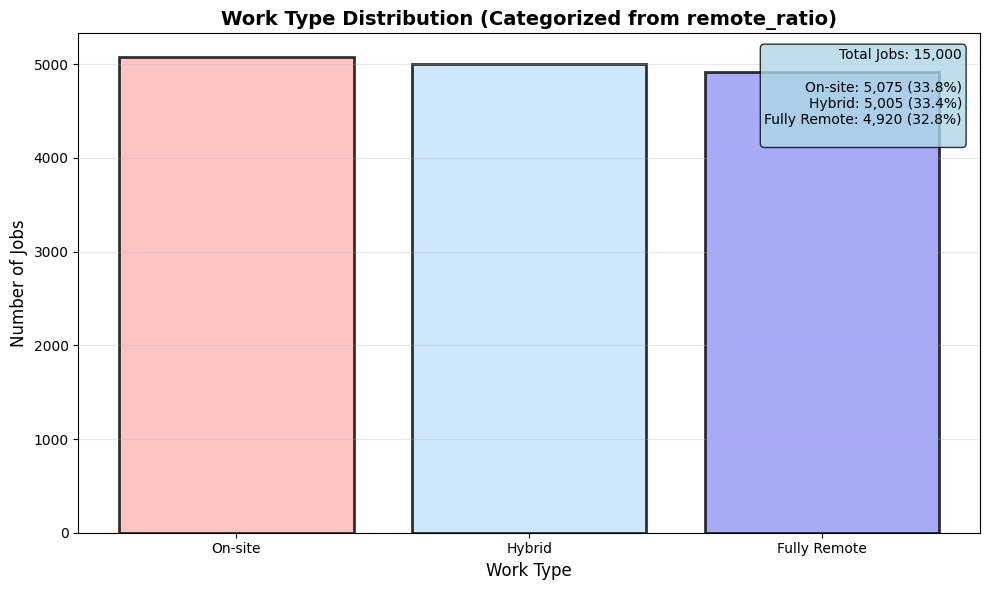

In [18]:
plt.figure(figsize=(10, 6))

# Count the number of jobs by work type (On-site, Hybrid, Fully Remote)
work_type_counts = data['work_type'].value_counts()
colors = ["#FFB4B4", "#C2E2FA", "#9195F6"]

bars = plt.bar(work_type_counts.index, work_type_counts.values, 
               color=colors, edgecolor='black', alpha=0.8, linewidth=2)

plt.ylabel('Number of Jobs', fontsize=12)
plt.xlabel('Work Type', fontsize=12)
plt.title('Work Type Distribution (Categorized from remote_ratio)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)


# Create a summary text box showing counts and percentages
summary_text = f'Total Jobs: {len(data):,}\n\n'
for work_type, count in work_type_counts.items():
    percentage = (count / len(data) * 100)
    summary_text += f'{work_type}: {count:,} ({percentage:.1f}%)\n'

plt.text(0.98, 0.97, summary_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

ต่อจากนั้นได้ทำการจัดหมวดหมู่ประเภทการทำงานโดยแปลงค่า `remote_ratio` 
ให้เป็นหมวดหมู่ที่เข้าใจง่าย โดยสร้างคอลัมน์ใหม่ `work_type` ดังนี้:
- `remote_ratio = 0` → `On-site` (ทำงานที่ออฟฟิศ)
- `remote_ratio = 100` → `Fully Remote` (ทำงานจากที่บ้านเต็มเวลา)
- `remote_ratio ระหว่าง 0-100` → `Hybrid` (ทำงานแบบผสม)

ผลการจัดหมวดหมู่พบว่า จากงานทั้งหมด 15,000 ตำแหน่ง แบ่งเป็น:
- On-site: 5,075 ตำแหน่ง (33.8%)
- Fully Remote: 4,900 ตำแหน่ง (32.8%)
- Hybrid: 5,025 ตำแหน่ง (33.4%)

โดยมีการกระจายที่ค่อนข้างสมดุลระหว่างทั้ง 3 รูปแบบการทำงาน

#### Job Distribution by Salary Range

In [19]:
# Categorize salary into ranges
def categorize_salary(salary):
    if salary < 60000:
        return 'Entry Level'
    elif salary < 100000:
        return 'Mid Level'
    elif salary < 150000:
        return 'Senior Level'
    else:
        return 'Executive Level'

data['salary_range'] = data['salary_usd'].apply(categorize_salary)
data['salary_range'].value_counts().sort_index()

salary_range
Entry Level        2302
Executive Level    3527
Mid Level          5230
Senior Level       3941
Name: count, dtype: int64

In [20]:
data[['salary_range']].head(10)

,salary_range
0,Mid Level
1,Mid Level
2,Executive Level
3,Mid Level
4,Entry Level
5,Senior Level
6,Mid Level
7,Mid Level
8,Executive Level
9,Senior Level


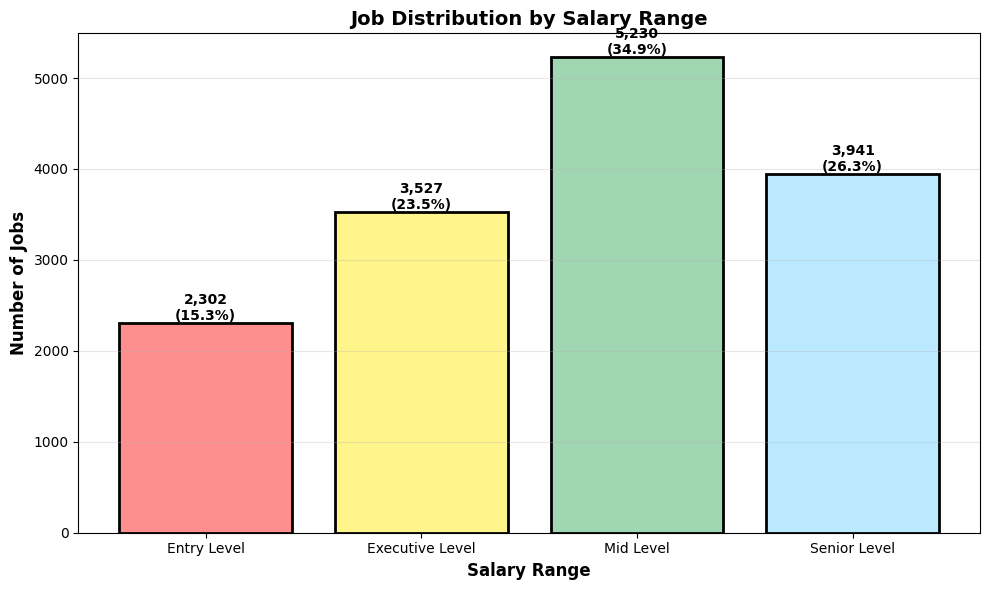

In [21]:
# Count the number of jobs in each salary range
salary_counts = data['salary_range'].value_counts().sort_index()

# Create a bar chart to visualize job distribution by salary range
plt.figure(figsize=(10, 6))
colors = ['#FF8F8F', '#FFF58A', '#A1D6B2', '#BBE9FF']
bars = plt.bar(salary_counts.index, salary_counts.values, 
               color=colors, edgecolor='black', linewidth=2)

plt.xlabel('Salary Range', fontsize=12, fontweight='bold')
plt.ylabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.title('Job Distribution by Salary Range', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value and percentage labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / len(data) * 100)
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontweight='bold')


plt.tight_layout()
plt.show()

จากนั้นได้ทำการจัดหมวดหมู่ช่วงเงินเดือนโดยแปลงค่า `salary_usd` 
ให้เป็นหมวดหมู่ตามระดับเงินเดือน โดยสร้างคอลัมน์ใหม่ `salary_range` ดังนี้:
- `salary_usd ≤ $60,000` → `Entry Level`
- `$60,000 < salary_usd ≤ $100,000` → `Mid Level`
- `$100,000 < salary_usd ≤ $150,000` → `Senior Level`
- `salary_usd > $150,000` → `Executive Level`

ผลการจัดหมวดหมู่พบว่า จากงานทั้งหมด 15,000 ตำแหน่ง แบ่งเป็น:
- Entry Level: 2,302 ตำแหน่ง (15.3%)
- Mid Level: 5,230 ตำแหน่ง (34.9%)
- Senior Level: 3,941 ตำแหน่ง (26.3%)
- Executive Level: 3,527 ตำแหน่ง (23.5%)

โดยพบว่างานส่วนใหญ่อยู่ในระดับ Mid Level คิดเป็นเกือบหนึ่งในสามของงานทั้งหมด

#### Job Distribution by Experience Level

In [22]:
# Categorize employees by years of experience
def categorize_experience(years):
    if years <= 2:
        return 'Junior'
    elif years <= 5:
        return 'Mid-level'
    elif years <= 10:
        return 'Senior'
    else:
        return 'Expert'

data['experience_category'] = data['years_experience'].apply(categorize_experience)
data['experience_category'].value_counts().sort_index()

experience_category
Expert       3376
Junior       4957
Mid-level    3299
Senior       3368
Name: count, dtype: int64

In [23]:
data[['experience_category']].head()

,experience_category
0,Senior
1,Junior
2,Junior
3,Senior
4,Junior


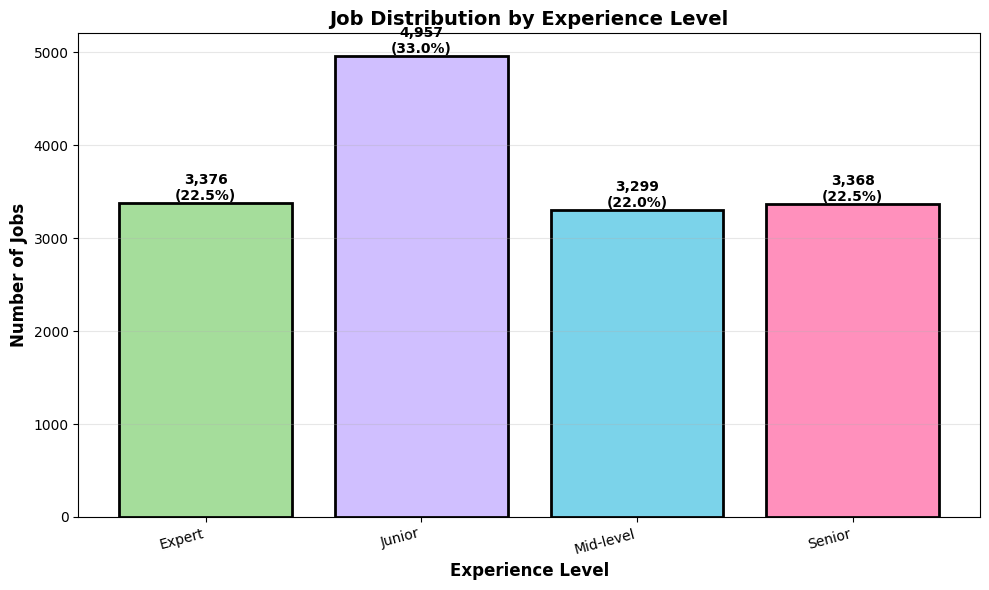

In [24]:
# Count the number of jobs in each experience level
exp_counts = data['experience_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
colors = ['#A5DD9B', '#D0BFFF', '#7BD3EA', '#FF90BC']
bars = plt.bar(exp_counts.index, exp_counts.values, 
               color=colors, edgecolor='black', linewidth=2)

plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.title('Job Distribution by Experience Level', fontsize=14, fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add count and percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    pct = height / len(data) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height,
            f'{int(height):,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

ถัดมาได้ทำการจัดหมวดหมู่ระดับประสบการณ์โดยแปลงค่า `years_experience` 
ให้เป็นหมวดหมู่ตามช่วงปีประสบการณ์ โดยสร้างคอลัมน์ใหม่ `experience_category` ดังนี้:
- `0 ≤ years_experience ≤ 2 ปี` → `Junior`
- `2 < years_experience ≤ 5 ปี` → `Mid-level`
- `5 < years_experience ≤ 10 ปี` → `Senior`
- `years_experience > 10 ปี` → `Expert`

ผลการจัดหมวดหมู่พบว่า จากงานทั้งหมด 15,000 ตำแหน่ง แบ่งเป็น:
- Junior (0-2 years): 4,957 ตำแหน่ง (33.0%)
- Mid-level (3-5 years): 3,299 ตำแหน่ง (22.0%)
- Senior (6-10 years): 3,368 ตำแหน่ง (22.5%)
- Expert (10+ years): 3,376 ตำแหน่ง (22.5%)

#### Job Distribution by Benefits Level

In [25]:
# Categorize benefits score
def categorize_benefits(score):
    if score < 6:
        return 'Low Benefits'
    elif score < 8:
        return 'Medium Benefits'
    else:
        return 'High Benefits'

data['benefits_category'] = data['benefits_score'].apply(categorize_benefits)
data['benefits_category'].value_counts()

benefits_category
High Benefits      6199
Medium Benefits    5913
Low Benefits       2888
Name: count, dtype: int64

In [26]:
data[['benefits_category']].head()

,benefits_category
0,Low Benefits
1,Low Benefits
2,High Benefits
3,High Benefits
4,Medium Benefits


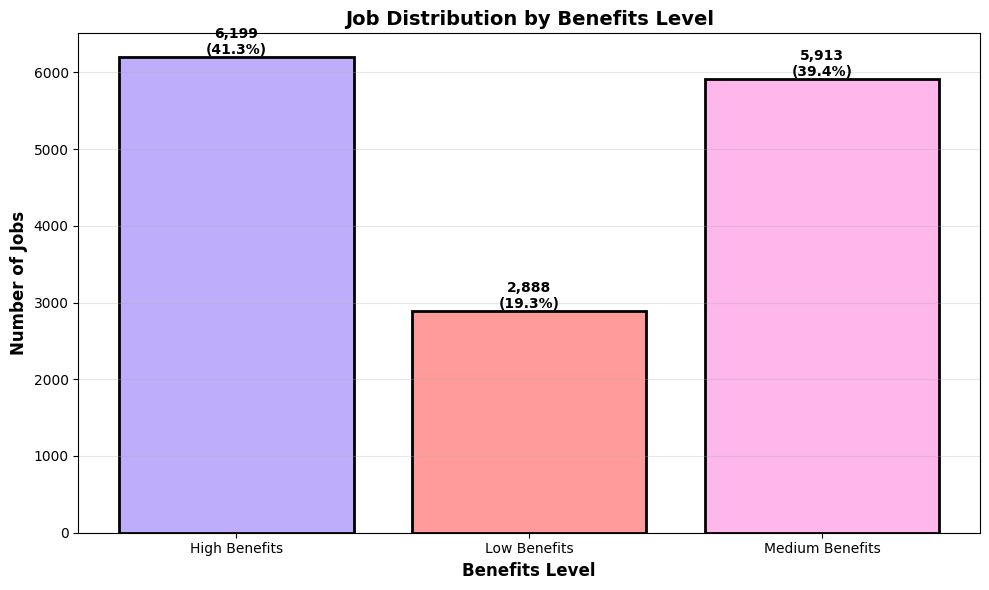

In [27]:
# Count the number of jobs in each benefits level
benefits_counts = data['benefits_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
colors = ['#BEADFA', '#FF9B9B', '#FDB7EA']
bars = plt.bar(benefits_counts.index, benefits_counts.values, 
               color=colors, edgecolor='black', linewidth=2)

plt.xlabel('Benefits Level', fontsize=12, fontweight='bold')
plt.ylabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.title('Job Distribution by Benefits Level', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    pct = height / len(data) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height,
            f'{int(height):,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

ได้ทำการจัดหมวดหมู่ระดับสวัสดิการโดยแปลงค่า `benefits_score` 
ให้เป็นหมวดหมู่ตามคะแนนสวัสดิการ โดยสร้างคอลัมน์ใหม่ `benefits_category` ดังนี้:
- `benefits_score < 6` → `Low Benefits`
- `6 ≤ benefits_score < 8` → `Medium Benefits`
- `benefits_score ≥ 8` → `High Benefits`

ผลการจัดหมวดหมู่พบว่า จากงานทั้งหมด 15,000 ตำแหน่ง แบ่งเป็น:
- Low Benefits: 2,888 ตำแหน่ง (19.3%)
- Medium Benefits: 5,913 ตำแหน่ง (39.4%)
- High Benefits: 6,199 ตำแหน่ง (41.3%)

#### Processing Required Skills

ก่อนที่จะสร้างโมเดล เราต้องประมวลผลคอลัมน์ `required_skills` ซึ่งมี 13,663 combinations ที่ไม่ซ้ำกัน
แต่จริงๆ แล้วมีเพียง 24 skills ที่แตกต่างกัน

เราจะแปลง `required_skills` ให้เป็น binary features (0 หรือ 1) สำหรับแต่ละ skill

In [28]:
#Extract all unique skills
from collections import Counter

all_skills = []
for skills_str in data['required_skills']:
    skills = [s.strip() for s in skills_str.split(',')]
    all_skills.extend(skills)

skill_counts = Counter(all_skills)

# Show top 24 skills
print("All Skills and Their Frequencies:")
print("="*70)
for i, (skill, count) in enumerate(skill_counts.most_common(), 1):
    percentage = (count / len(data)) * 100
    print(f"{i:2d}. {skill:25s} - {count:5,} jobs ({percentage:5.1f}%)")

print("\n" + "="*70)
print(f"Total unique skills: {len(skill_counts)}")

All Skills and Their Frequencies:
 1. Python                    - 4,450 jobs ( 29.7%)
 2. SQL                       - 3,407 jobs ( 22.7%)
 3. TensorFlow                - 3,022 jobs ( 20.1%)
 4. Kubernetes                - 3,009 jobs ( 20.1%)
 5. Scala                     - 2,794 jobs ( 18.6%)
 6. PyTorch                   - 2,777 jobs ( 18.5%)
 7. Linux                     - 2,705 jobs ( 18.0%)
 8. Git                       - 2,631 jobs ( 17.5%)
 9. Java                      - 2,578 jobs ( 17.2%)
10. GCP                       - 2,442 jobs ( 16.3%)
11. Hadoop                    - 2,419 jobs ( 16.1%)
12. Tableau                   - 2,341 jobs ( 15.6%)
13. R                         - 2,311 jobs ( 15.4%)
14. Computer Vision           - 2,284 jobs ( 15.2%)
15. Data Visualization        - 2,270 jobs ( 15.1%)
16. Deep Learning             - 2,189 jobs ( 14.6%)
17. MLOps                     - 2,164 jobs ( 14.4%)
18. Spark                     - 2,155 jobs ( 14.4%)
19. NLP                       

In [29]:
# Use get_dummies to create binary features for all skills at once
skill_dummies = data['required_skills'].str.get_dummies(sep=', ')
skill_dummies = skill_dummies.add_prefix('skill_')

# Add skill columns to the main dataframe
data = pd.concat([data, skill_dummies], axis=1)

print(f"Created {len(skill_counts)} binary skill features")
print(f"New dataset shape: {data.shape}")

# Show sample of new skill columns
skill_columns = [col for col in data.columns if col.startswith('skill_')]
print(f"\n Sample of skill features (first 5 jobs):")
data[skill_columns].head()

Created 24 binary skill features
New dataset shape: (15000, 53)

 Sample of skill features (first 5 jobs):


,skill_AWS,skill_Azure,skill_Computer Vision,skill_Data Visualization,skill_Deep Learning,skill_Docker,skill_GCP,skill_Git,skill_Hadoop,skill_Java,...,skill_NLP,skill_PyTorch,skill_Python,skill_R,skill_SQL,skill_Scala,skill_Spark,skill_Statistics,skill_Tableau,skill_TensorFlow
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


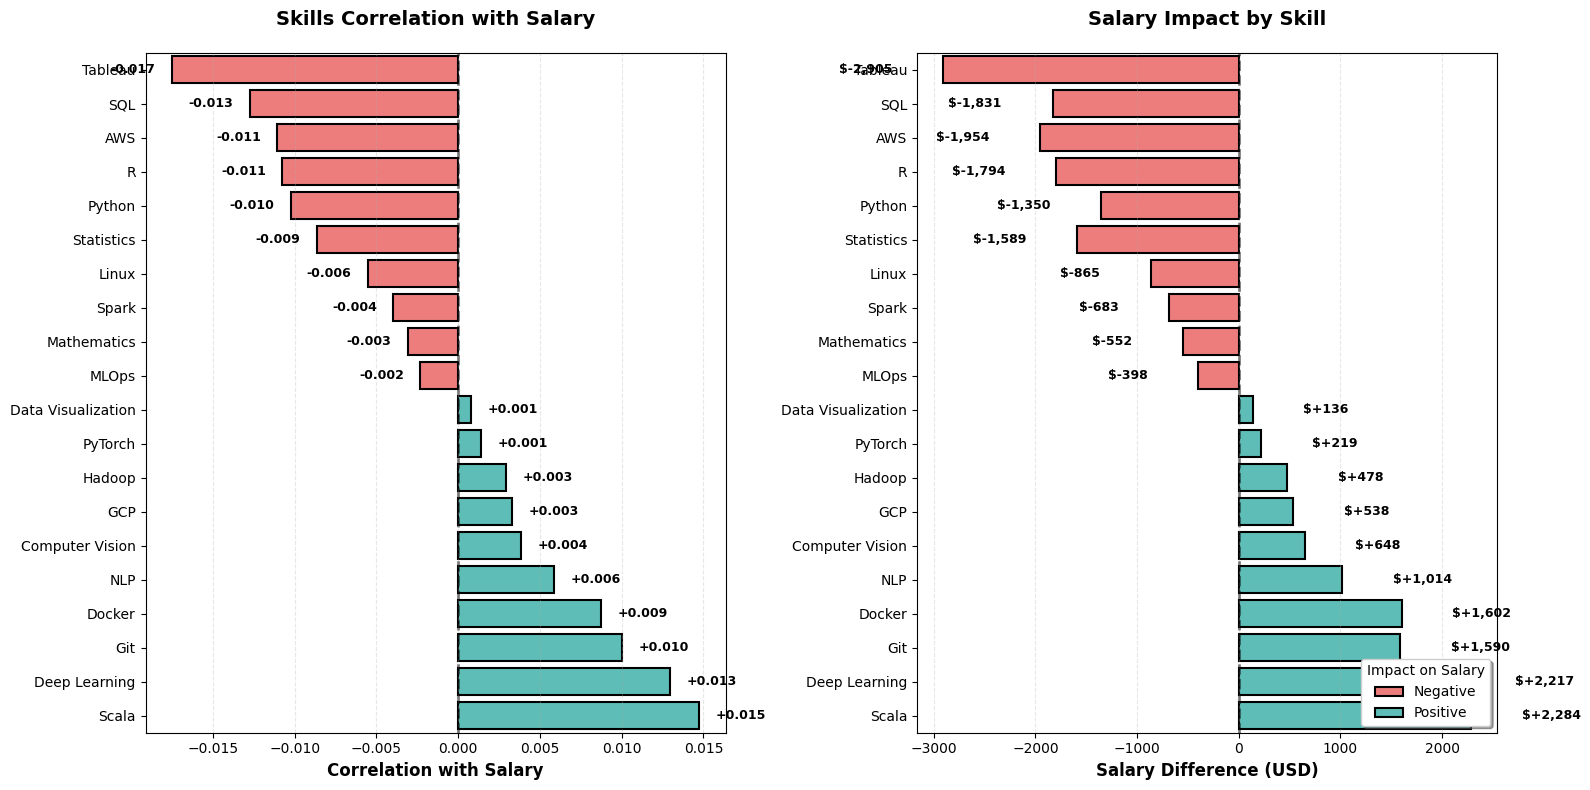


SKILLS CORRELATION WITH SALARY - SUMMARY

Top 5 Skills with HIGHEST Positive Impact:
  • Scala                → Correlation: +0.015 | Salary: $+2,284
  • Deep Learning        → Correlation: +0.013 | Salary: $+2,217
  • Git                  → Correlation: +0.010 | Salary: $+1,590
  • Docker               → Correlation: +0.009 | Salary: $+1,602
  • NLP                  → Correlation: +0.006 | Salary: $+1,014

Top 5 Skills with HIGHEST Negative Impact:
  • Tableau              → Correlation: -0.017 | Salary: $-2,905
  • SQL                  → Correlation: -0.013 | Salary: $-1,831
  • AWS                  → Correlation: -0.011 | Salary: $-1,954
  • R                    → Correlation: -0.011 | Salary: $-1,794
  • Python               → Correlation: -0.010 | Salary: $-1,350


In [30]:
# Analyze correlation between skills and salary
skill_correlations = data[skill_columns].corrwith(data['salary_usd']).sort_values(ascending=False)

# Prepare data for visualization
top_10_positive = skill_correlations.head(10)
top_10_negative = skill_correlations.tail(10)

# Combine both and calculate salary differences
all_skills = pd.concat([top_10_positive, top_10_negative])
salary_diffs = []

for skill in all_skills.index:
    skill_name = skill.replace('skill_', '').replace('_', ' ')
    avg_with = data[data[skill] == 1]['salary_usd'].mean()
    avg_without = data[data[skill] == 0]['salary_usd'].mean()
    diff = avg_with - avg_without
    salary_diffs.append({
        'Skill': skill_name, 
        'Correlation': all_skills[skill], 
        'Salary_Diff': diff,
        'Impact': 'Positive' if all_skills[skill] > 0 else 'Negative'
    })

corr_df = pd.DataFrame(salary_diffs).sort_values('Correlation', ascending=True)

# Create visualization with seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Correlation values using seaborn
palette_corr = {'Positive': '#4ECDC4', 'Negative': '#FF6B6B'}
sns.barplot(data=corr_df, y='Skill', x='Correlation', hue='Impact', 
            palette=palette_corr, dodge=False, ax=ax1, edgecolor='black', linewidth=1.5)
ax1.axvline(0, color='black', linewidth=2, linestyle='--', alpha=0.5)
ax1.set_xlabel('Correlation with Salary', fontsize=12, fontweight='bold')
ax1.set_ylabel('')
ax1.set_title('Skills Correlation with Salary', fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.legend_.remove()

# Add correlation values on bars
for i, row in corr_df.iterrows():
    x_pos = row['Correlation'] + (0.001 if row['Correlation'] > 0 else -0.001)
    ha = 'left' if row['Correlation'] > 0 else 'right'
    y_pos = corr_df.index.get_loc(i)
    ax1.text(x_pos, y_pos, f'{row["Correlation"]:+.3f}', 
             va='center', ha=ha, fontsize=9, fontweight='bold')

# Plot 2: Salary difference using seaborn
sns.barplot(data=corr_df, y='Skill', x='Salary_Diff', hue='Impact',
            palette=palette_corr, dodge=False, ax=ax2, edgecolor='black', linewidth=1.5)
ax2.axvline(0, color='black', linewidth=2, linestyle='--', alpha=0.5)
ax2.set_xlabel('Salary Difference (USD)', fontsize=12, fontweight='bold')
ax2.set_ylabel('')
ax2.set_title('Salary Impact by Skill', fontsize=14, fontweight='bold', pad=20)
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Customize legend
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, title='Impact on Salary', loc='lower right', 
           frameon=True, fancybox=True, shadow=True)

# Add salary values on bars
for i, row in corr_df.iterrows():
    x_pos = row['Salary_Diff'] + (500 if row['Salary_Diff'] > 0 else -500)
    ha = 'left' if row['Salary_Diff'] > 0 else 'right'
    y_pos = corr_df.index.get_loc(i)
    ax2.text(x_pos, y_pos, f'${row["Salary_Diff"]:+,.0f}', 
             va='center', ha=ha, fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*70)
print("SKILLS CORRELATION WITH SALARY - SUMMARY")
print("="*70)
print(f"\nTop 5 Skills with HIGHEST Positive Impact:")
for i, row in corr_df.tail(5).iloc[::-1].iterrows():
    print(f"  • {row['Skill']:20s} → Correlation: {row['Correlation']:+.3f} | Salary: ${row['Salary_Diff']:+,.0f}")

print(f"\nTop 5 Skills with HIGHEST Negative Impact:")
for i, row in corr_df.head(5).iterrows():
    print(f"  • {row['Skill']:20s} → Correlation: {row['Correlation']:+.3f} | Salary: ${row['Salary_Diff']:+,.0f}")
print("="*70)

หลังจากนำ columns `required_skills` มาสร้าง dummy variables แล้ว เราได้ binary features สำหรับแต่ละ skill ทั้งหมด 24 คอลัมน์
เช่น `skill_Python`, `skill_Deep Learning`, `skill_SQL` เป็นต้น

จากนั้นเราจะวิเคราะห์ความสัมพันธ์ระหว่าง **Skills กับ Salary** เพื่อตอบคำถาม:
- **Skills ไหนที่มีความสัมพันธ์กับเงินเดือนสูง?** (Positive Correlation)
- **Skills ไหนที่มีความสัมพันธ์กับเงินเดือนต่ำ?** (Negative Correlation)
- **มีความแตกต่างของเงินเดือนเท่าไร** ระหว่างคนที่มีและไม่มีแต่ละ skill?

**ผลการวิเคราะห์พบว่า:**

**Skills ที่มี Positive Impact (เงินเดือนสูงขึ้น):**
- **Scala** (+$2,284), **Deep Learning** (+$2,217), **Git** (+$1,590), **Docker** (+$1,602), **NLP** (+$1,014)
- เป็น skills ที่เชี่ยวชาญเฉพาะด้าน มักต้องการในตำแหน่ง Senior/Expert

**Skills ที่มี Negative Impact (เงินเดือนต่ำกว่า):**
- **Tableau** (-$2,905), **SQL** (-$1,831), **AWS** (-$1,954), **R** (-$1,794), **Python** (-$1,350)
- เป็น skills พื้นฐานที่มักพบในตำแหน่ง Entry-level หรือ Junior


#### Distribution of the compensation score (combining salary and benefits)

In [31]:
#  Create a comprehensive compensation score (combining salary and benefits)
# Normalize salary to 0-10 scale
salary_normalized = (data['salary_usd'] - data['salary_usd'].min()) / (data['salary_usd'].max() - data['salary_usd'].min()) * 10

# Compensation score = weighted average (70% salary, 30% benefits)
data['compensation_score'] = (salary_normalized * 0.7) + (data['benefits_score'] * 0.3)

data['compensation_score'].describe()

count    15000.000000
mean         3.832972
std          1.230690
min          1.509433
25%          2.961340
50%          3.595604
75%          4.475519
max          9.980694
Name: compensation_score, dtype: float64

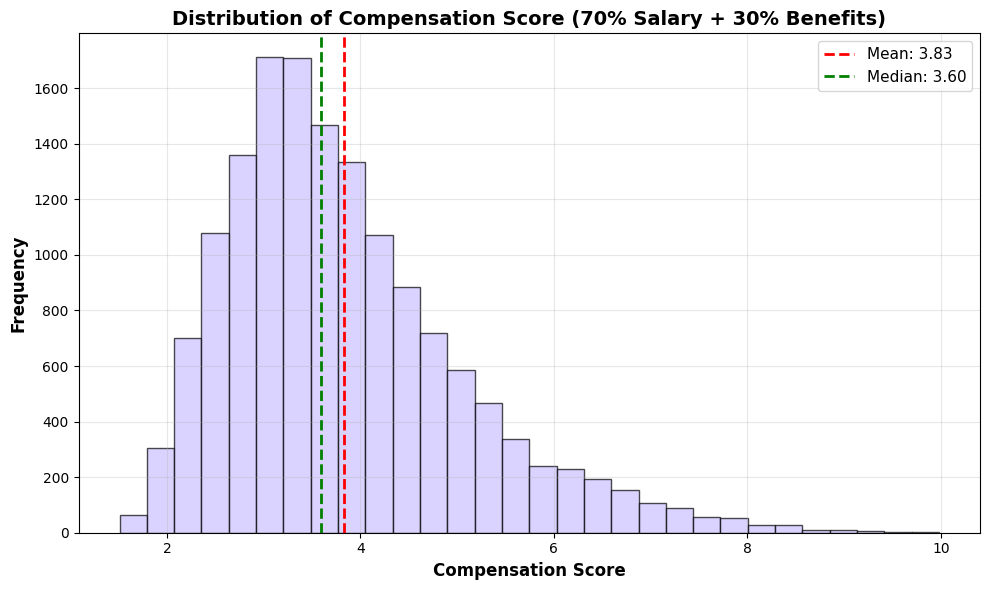

In [32]:
# Plot the distribution of the compensation score (combining salary and benefits)
plt.figure(figsize=(10, 6))

plt.hist(data['compensation_score'], bins=30, edgecolor='black', alpha=0.7, color='#CDC1FF')

mean_val = data['compensation_score'].mean()
median_val = data['compensation_score'].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

plt.xlabel('Compensation Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Compensation Score (70% Salary + 30% Benefits)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

สุดท้ายได้สร้างคะแนนค่าตอบแทนรวม (Comprehensive Compensation Score) 
โดยรวมเงินเดือนและสวัสดิการเข้าด้วยกัน:

**วิธีการคำนวณ:**
1. นำเงินเดือน (`salary_usd`) มา normalize ให้อยู่ในช่วง 0-10
2. คำนวณคะแนนรวม: **70% เงินเดือน + 30% สวัสดิการ**
   - `compensation_score = (salary_normalized × 0.7) + (benefits_score × 0.3)`

**ผลลัพธ์:**
- คะแนนต่ำสุด: 1.51
- คะแนนสูงสุด: 9.98
- คะแนนเฉลี่ย: 3.83
- คะแนนกลาง: 3.60

คะแนนนี้ช่วยประเมินความน่าสนใจของงานโดยรวม โดยให้น้ำหนักกับเงินเดือนมากกว่าเล็กน้อย 
(70:30) เนื่องจากเงินเดือนมักเป็นปัจจัยหลักในการตัดสินใจของผู้สมัครงาน

In [33]:
print(f"\nDataset shape after processing: {data.shape}")
print(f"Total columns now: {len(data.columns)}")


Dataset shape after processing: (15000, 54)
Total columns now: 54


#### Data Summarization

In [34]:
# Display sample of processed data
data.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,skill_PyTorch,skill_Python,skill_R,skill_SQL,skill_Scala,skill_Spark,skill_Statistics,skill_Tableau,skill_TensorFlow,compensation_score
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,...,1,0,0,0,0,0,0,1,0,2.874816
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,...,0,1,0,0,0,0,0,0,0,2.120953
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,...,0,0,0,0,0,0,0,0,0,5.113519
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,...,0,1,0,1,1,0,0,0,0,3.490785
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,...,0,1,0,0,0,0,0,1,0,2.402109
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,...,0,0,1,1,0,0,0,0,0,3.508753
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,...,0,0,1,0,0,0,0,0,0,2.790378
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,...,0,1,0,1,0,0,0,0,0,3.007945
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,...,0,1,0,0,0,0,0,0,0,5.237888
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,...,0,0,0,0,1,0,0,0,0,3.077420


In [35]:
data.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name', 'posting_year', 'posting_month', 'posting_day',
       'posting_dayofweek', 'posting_quarter', 'days_to_apply', 'work_type',
       'salary_range', 'experience_category', 'benefits_category', 'skill_AWS',
       'skill_Azure', 'skill_Computer Vision', 'skill_Data Visualization',
       'skill_Deep Learning', 'skill_Docker', 'skill_GCP', 'skill_Git',
       'skill_Hadoop', 'skill_Java', 'skill_Kubernetes', 'skill_Linux',
       'skill_MLOps', 'skill_Mathematics', 'skill_NLP', 'skill_PyTorch',
       'skill_Python', 'skill_R', 'skill_SQL', 'skill_Scala', 'skill_Spark',
       'skill_Statistics', 'skill_Tableau'

**สรุปการประมวลผลข้อมูล:**

จากการประมวลผลข้อมูลด้านบน เราได้สร้างฟีเจอร์ใหม่ทั้งหมด 11 คอลัมน์:

1. **Time-based features (5 คอลัมน์):** `posting_year`, `posting_month`, `posting_day`, `posting_dayofweek`, `posting_quarter` - ช่วยวิเคราะห์แนวโน้มตามเวลา
2. **Application window:** `days_to_apply` - จำนวนวันที่เปิดรับสมัคร
3. **Categorical features (4 คอลัมน์):** `work_type`, `salary_range`, `experience_category`, `benefits_category` - จัดกลุ่มข้อมูลให้เข้าใจง่าย
4. **Derived metric:** `compensation_score` - คะแนนรวมค่าตอบแทนและสวัสดิการ

ขนาดข้อมูลหลังประมวลผล: **15,000 แถว × 30 คอลัมน์**

## Exploratory Data Analysis

#### Top 10 Highest Paying Industries

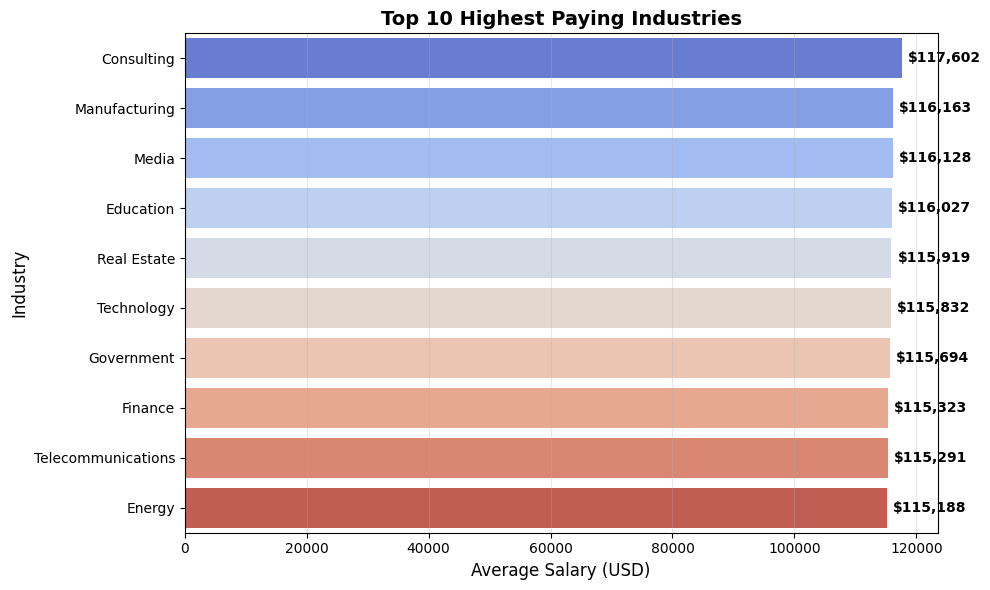

In [36]:
plt.figure(figsize=(10,6))

# Calculate the average salary for each industry and get the top 10 highest paying industries
industry_salary = (
    data.groupby('industry')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10) 
)

bars = sns.barplot(
    x=industry_salary.values,
    y=industry_salary.index,
    palette='coolwarm'
)

plt.title('Top 10 Highest Paying Industries', fontsize=14, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.grid(axis='x', alpha=0.3)

for i, value in enumerate(industry_salary.values):
    plt.text(value + 1000, i, f"${value:,.0f}", va='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


Insight: 
อุตสาหกรรมที่มีเงินเดือนเฉลี่ยสูงสุด ได้แก่ **Consulting**, **Manufacturing**, และ **Media** 

#### Salary Distribution by Company Size

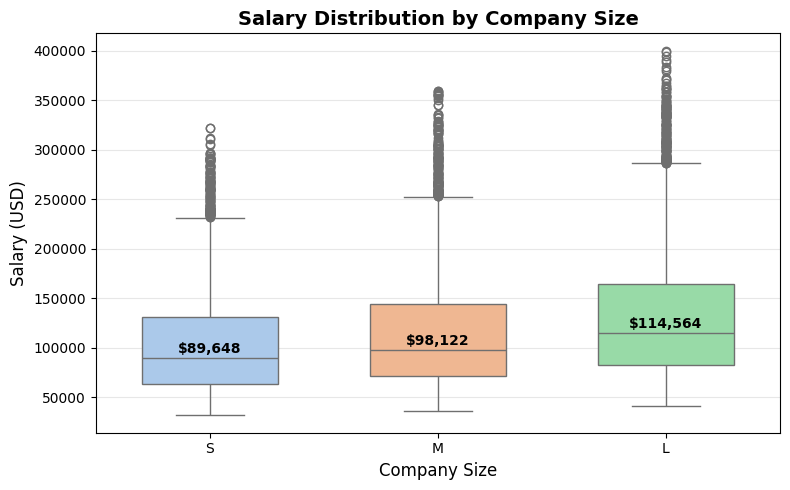

In [37]:
#Company Size vs Salary
plt.figure(figsize=(8, 5))
order = ["S", "M", "L"]

sns.boxplot( data=data,x='company_size', y='salary_usd', order=order, palette='pastel',width=0.6)

plt.title('Salary Distribution by Company Size', fontsize=14, fontweight='bold')
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

med = data.groupby('company_size')['salary_usd'].median().reindex(order)
for i, v in enumerate(med.values):
    plt.text(i, v + 2000, f"${v:,.0f}", ha="center", va="bottom", fontsize=10, weight="bold")

    
plt.tight_layout()
plt.show()

Insight:
- เงินเดือน **สูงขึ้นตามขนาดบริษัท** อย่างเห็นได้ชัด  
  - S: \$89,648 M: \$98,122 L: \$114,564  
- บริษัทใหญ่ (L) ให้ค่าตอบแทนเฉลี่ยสูงสุด 
- ช่วงกระจายของรายได้ในบริษัทใหญ่ **กว้างกว่า**  
แสดงว่ามีทั้งตำแหน่งระดับ Junior ถึง Expert ภายในองค์กรเดียวกัน

#### Work Type Distribution by Experience Level

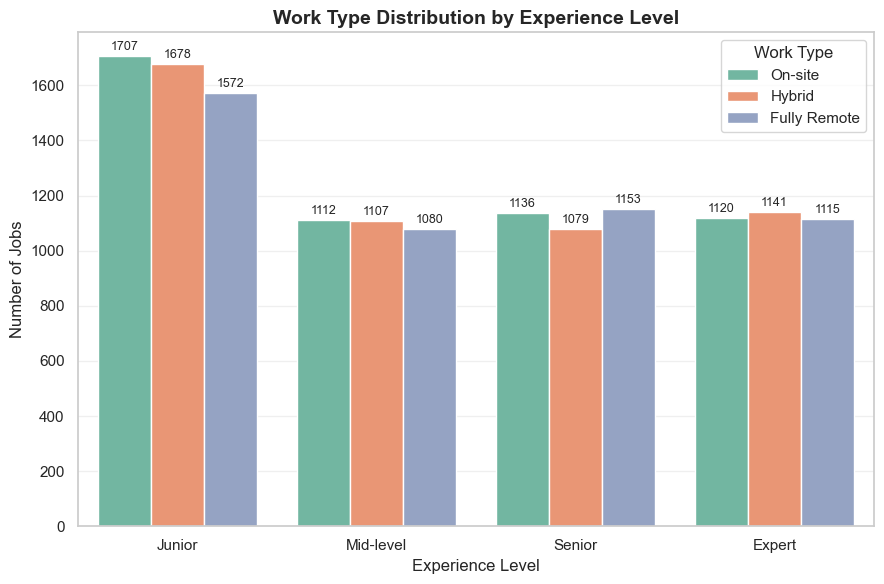

In [38]:
plt.figure(figsize=(9,6))
sns.set_theme(style="whitegrid")

order = ["Junior", "Mid-level", "Senior", "Expert"]
hue_order = ["On-site", "Hybrid", "Fully Remote"]

ax = sns.countplot( data=data, x="experience_category", hue="work_type", order=order, hue_order=hue_order, palette="Set2")

plt.title("Work Type Distribution by Experience Level", fontsize=14, fontweight="bold")
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Number of Jobs", fontsize=12)      
plt.legend(title="Work Type", loc="upper right")
plt.grid(axis="y", alpha=0.3)

for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=2, fontsize=9)

plt.tight_layout()
plt.show()


#### Salary by Work Type

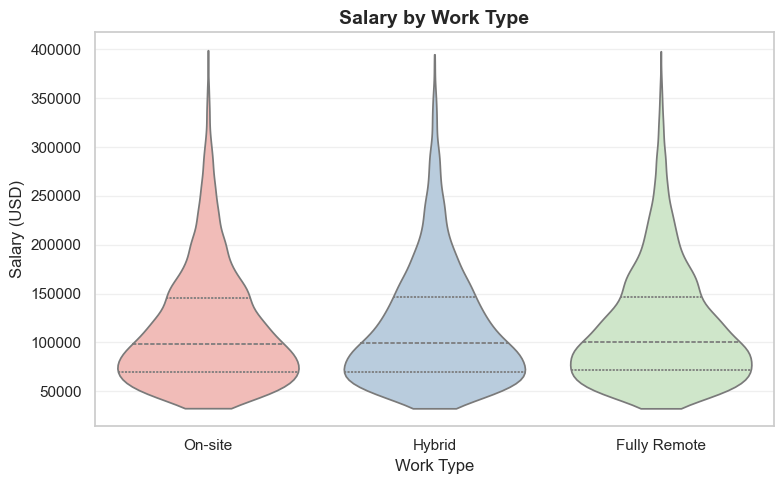

In [39]:
plt.figure(figsize=(8,5))
order = ['On-site','Hybrid','Fully Remote']
sns.violinplot(data=data, x='work_type', y='salary_usd',
               order=order, inner='quartile', palette='Pastel1', cut=0)
plt.title('Salary by Work Type', fontsize=14, fontweight='bold')
plt.xlabel('Work Type'); plt.ylabel('Salary (USD)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout(); plt.show()


#### Average Salary by Experience Level

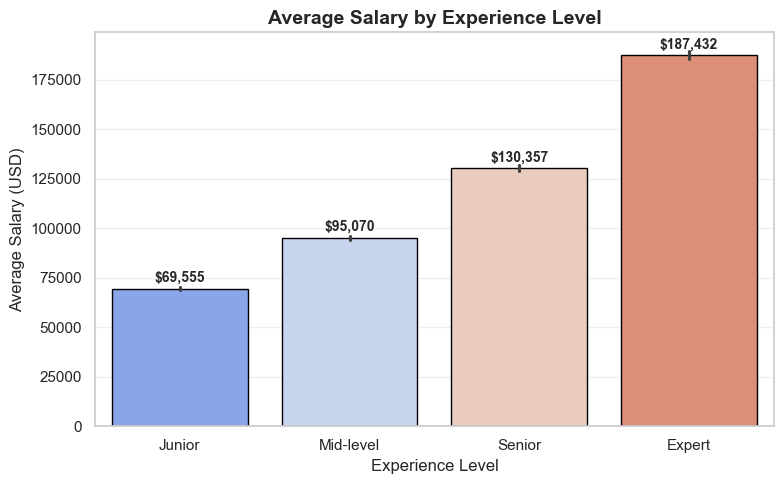

In [40]:
plt.figure(figsize=(8,5))
exp_order = ["Junior", "Mid-level", "Senior", "Expert"]

sns.barplot(
    data=data,
    x="experience_category",
    y="salary_usd",
    order=exp_order,
    estimator="mean",
    errorbar="ci",
    palette="coolwarm",
    edgecolor="black"
)

plt.title("Average Salary by Experience Level", fontsize=14, fontweight="bold")
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.grid(axis="y", alpha=0.3)

means = data.groupby("experience_category")["salary_usd"].mean().reindex(exp_order)
for i, v in enumerate(means.values):
    plt.text(i, v + 2000, f"${v:,.0f}", ha="center", va="bottom", fontsize=10, weight="bold")

plt.tight_layout()
plt.show()


Insight: ค่าจ้างเฉลี่ยไต่ระดับตามประสบการณ์อย่างชัดเจน (Junior < Mid < Senior < Expert)

#### Most In-Demand Skills


In [41]:
plt.figure(figsize=(10, max(6, len(data['required_skills'])/500)))

all_skills = data['required_skills'].dropna().str.split(',').sum()
all_skills = [s.strip() for s in all_skills if s.strip() != '']

skill_counts = Counter(all_skills)

skills_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])
skills_df = skills_df.sort_values(by='Count', ascending=False)

<Figure size 1000x3000 with 0 Axes>

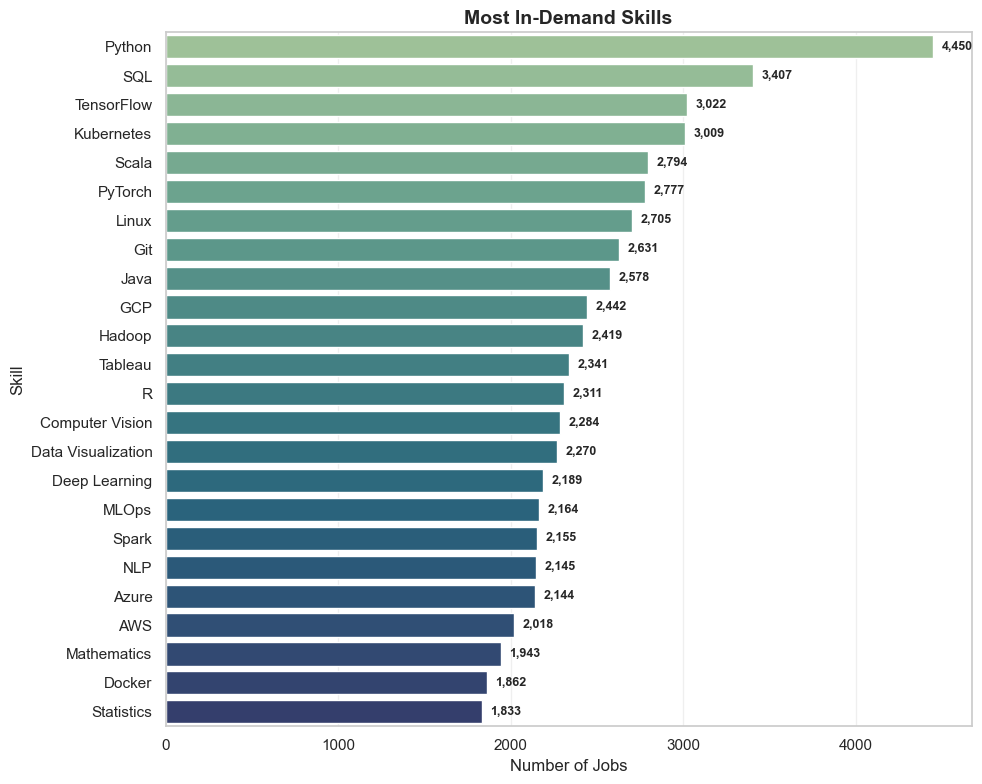

In [42]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=skills_df.head(30),
    x='Count',
    y='Skill',
    palette='crest'
)

plt.title('Most In-Demand Skills', fontsize=14, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(skills_df.head(30)['Count']):
    plt.text(v + 50, i, f'{v:,}', va='center', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

#### Years of Experience vs Salary

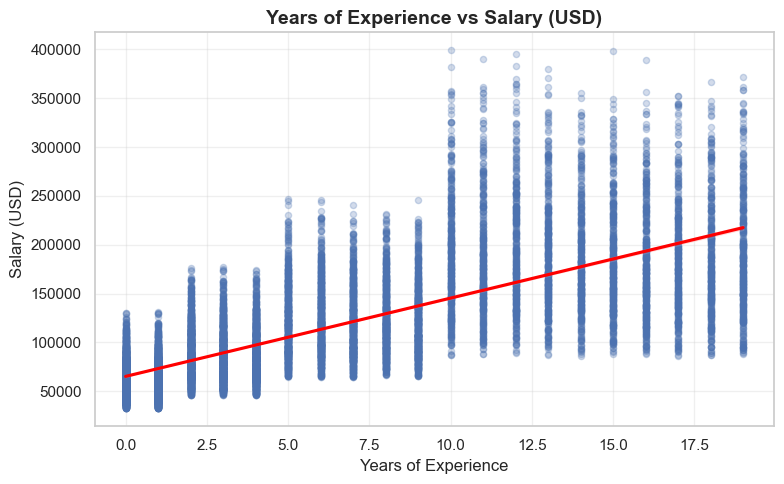

In [43]:
plt.figure(figsize=(8,5))
sns.regplot(data=data, x='years_experience', y='salary_usd',
            scatter_kws={'alpha':0.25, 's':20}, line_kws={'color':'red'})
plt.title('Years of Experience vs Salary (USD)', fontsize=14, fontweight='bold')
plt.xlabel('Years of Experience'); plt.ylabel('Salary (USD)')
plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()

#### Correlation Matrix

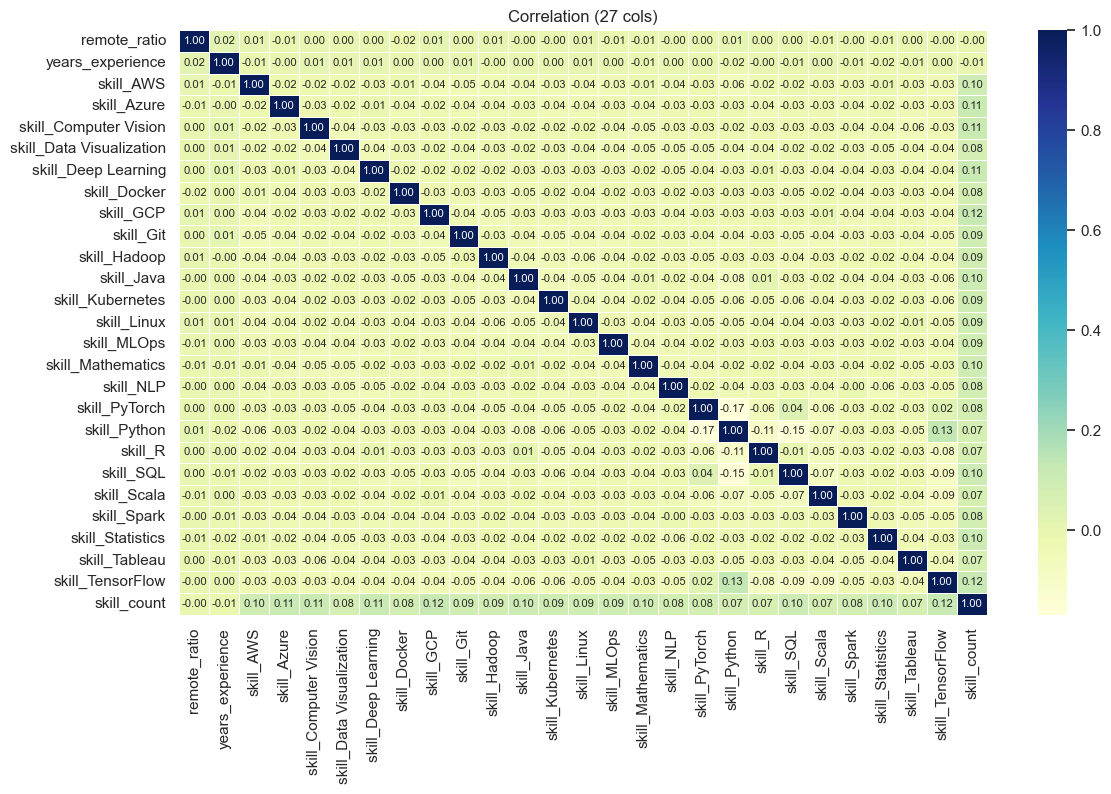

In [61]:
skill_columns = globals().get('skill_columns', [c for c in data.columns if c.startswith('skill_')])

sel = ['remote_ratio', 'years_experience'] + skill_columns + ['skill_count']
sel_present = [c for c in sel if c in data.columns]

df = data[sel_present].select_dtypes(include=[np.number])  # keep numeric only
if df.shape[1] == 0:
    raise ValueError("No numeric columns found in selection")

corr = df.corr()
plt.figure(figsize=(max(8, df.shape[1]*0.45), max(6, df.shape[1]*0.3)))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, annot_kws={"size":8})
plt.title(f"Correlation ({df.shape[1]} cols)")
plt.tight_layout()
plt.show()


## Data Modeling

สร้าง Model เพื่อเรียนรู้ของการคาดการณ์ **salary_usd** ซึ่งสามารถสร้างประโยชน์ได้ เช่น:
- ลูกจ้างประเมินรายได้ของตัวเองได้
- บริษัทสามารถวิเคราะห์ฐานเงินเดือนที่เหมาะสม
- เข้าใจปัจจัยที่มีอิทธิพลแก่งานเกี่ยวกัับ AI

**Target Variable:**
- `salary_usd`: เงินเดือนหน่วย USD

**Features we'll use:**

1. **Numerical Features:**
   - `remote_ratio` - อัตราการทำงานระยะไกล (0-100%)
   - `years_experience` - ปีประสบการณ์ที่ต้องการ
   - **24 Binary Skill Features** - แต่ละ skill เป็น 0 หรือ 1 (Python, SQL, TensorFlow, etc.)

2. **Categorical Features:**
   - `job_title` - ชื่ออาชีพ
   - `experience_level` - ระดับประสบการณ์ (EN/MI/SE/EX)
   - `employment_type` - ประเภทการจ้างงาน (FT/PT/CT/FL)
   - `company_location` - ประเทศที่ตั้งบริษัท
   - `company_size` - ขนาดบริษัท (S/M/L)
   - `education_required` - การศึกษาที่ต้องการ (Bachelor/Master/PhD/Associate)
   - `industry` - อุตสาหกรรม (15 categories)
     
**Total Features After Encoding:** ~61 features
- 26 numerical (2 + 24 skills)
- 28 from categorical encoding (7 categories → ~28 after one-hot encoding)

In [45]:
# all col now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   job_id                    15000 non-null  object        
 1   job_title                 15000 non-null  object        
 2   salary_usd                15000 non-null  int64         
 3   salary_currency           15000 non-null  object        
 4   experience_level          15000 non-null  object        
 5   employment_type           15000 non-null  object        
 6   company_location          15000 non-null  object        
 7   company_size              15000 non-null  object        
 8   employee_residence        15000 non-null  object        
 9   remote_ratio              15000 non-null  int64         
 10  required_skills           15000 non-null  object        
 11  education_required        15000 non-null  object        
 12  years_experience  

In [46]:
# Use existing skill columns (already processed in Data Processing section)
skill_columns = [col for col in data.columns if col.startswith('skill_')]

# crate skill count column!!
data['skill_count'] = data[skill_columns].sum(axis=1)

numerical_features = list(dict.fromkeys([  # Remove duplicates
    'remote_ratio', 'years_experience',] + skill_columns +['skill_count']))

categorical_features = ["job_title", "experience_level", "employment_type", "company_location",
    "company_size", "education_required", "industry"]

X = data[numerical_features + categorical_features]
Y = data['salary_usd']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,
                                                    random_state=42)

print("="*70)
print(f"Numerical features: {len(numerical_features)} ({len(skill_columns)} skills + 5 others)")
print(f"Categorical features: {len(categorical_features)}")
print(f"Total input features: {len(numerical_features) + len(categorical_features)}")
print("="*70)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("="*70)

Numerical features: 27 (24 skills + 5 others)
Categorical features: 7
Total input features: 34
Training set shape: (11250, 34)
Testing set shape: (3750, 34)


In [47]:
#Transform numerical features (standardization)
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])


#Transform categorical features (one-hot encoding)
# OneHotEncoder converts categorical variables into binary dummy variables (0 or 1)
categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test) 

print("Transformed training set shape = ",X_train_transformed.shape)
print("Transformed testing set shape = ",X_test_transformed.shape)

# Get feature names after preprocessing
feature_names_out = (
    numerical_features +
    [f"{feature}_{val}" for feature, vals in 
     zip(categorical_features, 
         preprocessor.named_transformers_['cat'].named_steps['onehot'].categories_)
     for val in vals[1:]]
)


Transformed training set shape =  (11250, 90)
Transformed testing set shape =  (3750, 90)


In [48]:
#Train model 

models = {'LinearRegression' : LinearRegression(),
          'Ridge regression' : Ridge(alpha=1.0),
          'Random Forest' : RandomForestRegressor(n_estimators=200,random_state=42),
          'Gradient Boosting' : GradientBoostingRegressor(n_estimators=200,random_state=42)}

#Train
results={}
for name,model in models.items():
    model.fit(X_train_transformed,Y_train)

    #Prediction
    Y_pred = model.predict(X_test_transformed)

    #Evaluate
    mse = mean_squared_error(Y_test,Y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)

    #Store results
    results[name]={
        'RMSE' : rmse,
        'MAE' : mae,
        'R2' : r2
     }

results_df = pd.DataFrame(results).T
print("Model Performance = ")
print("\n",results_df)


Model Performance = 

                            RMSE           MAE        R2
LinearRegression   23467.573613  17114.626286  0.852489
Ridge regression   23467.234159  17103.782461  0.852493
Random Forest      22079.649567  15690.693423  0.869421
Gradient Boosting  20312.600250  14650.471396  0.889485


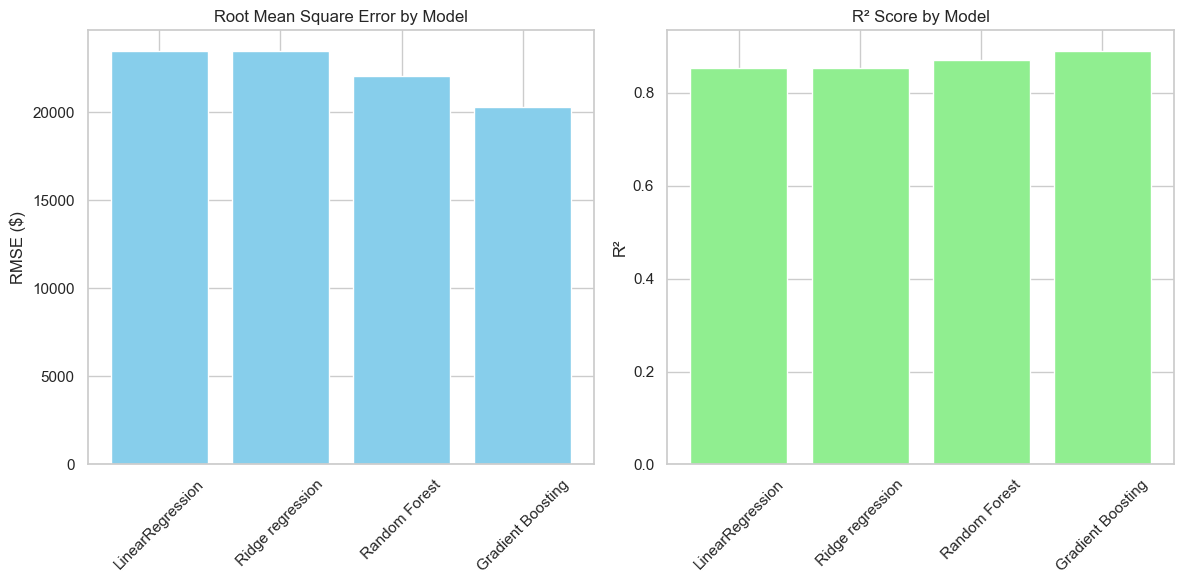


Best performing model: Gradient Boosting
R² Score: 0.8895
RMSE: $20,312.60
MAE: $14,650.47


In [49]:
# Visualize 
plt.figure(figsize=(12, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(results_df.index, results_df['RMSE'], color='skyblue')
plt.title('Root Mean Square Error by Model')
plt.xticks(rotation=45)
plt.ylabel('RMSE ($)')

# Plot R2 Score
plt.subplot(1, 2, 2)
plt.bar(results_df.index, results_df['R2'], color='lightgreen')
plt.title('R² Score by Model')
plt.xticks(rotation=45)
plt.ylabel('R²')

plt.tight_layout()
plt.show()


best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
print(f"\nBest performing model: {best_model_name}")
print(f"R² Score: {results_df.loc[best_model_name, 'R2']:.4f}")
print(f"RMSE: ${results_df.loc[best_model_name, 'RMSE']:,.2f}")
print(f"MAE: ${results_df.loc[best_model_name, 'MAE']:,.2f}")


In [50]:
best_model = models[best_model_name]

# Create a dynamic filename (e.g., "Random_Forest_best_model.joblib")
model_filename = f'{best_model_name.replace(" ", "_")}_best_model.joblib'

joblib.dump(best_model, model_filename)
print(f"\nSuccessfully exported best model to: {model_filename}")


Successfully exported best model to: Gradient_Boosting_best_model.joblib


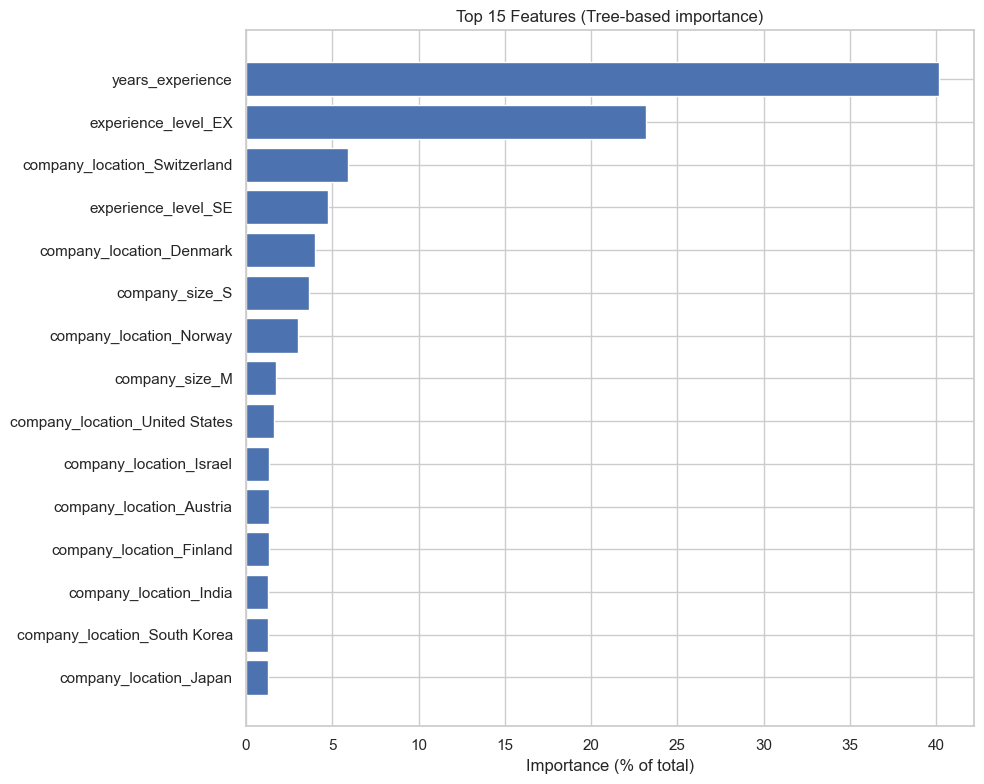

                          feature  importance_pct
0                years_experience       40.183797
1             experience_level_EX       23.161634
2    company_location_Switzerland        5.891675
3             experience_level_SE        4.759919
4        company_location_Denmark        3.969482
5                  company_size_S        3.643807
6         company_location_Norway        3.005988
7                  company_size_M        1.711568
8  company_location_United States        1.594591
9         company_location_Israel        1.355924


In [51]:
# Analyze feature importance for the best model (percent scale, auto support tree/linear)
try:
    # Get importances
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        label = 'Tree-based importance'
    elif hasattr(best_model, 'coef_'):
        stds = np.std(X_train_transformed, axis=0)
        importances = np.abs(best_model.coef_ * stds)
        label = 'Standardized coef (linear)'
    else:
        raise AttributeError("Model has no feature_importances_ or coef_")

    # Feature names fallback
    if 'feature_names_out' in globals() and len(feature_names_out) == len(importances):
        features = feature_names_out
    else:
        features = [f'Feature_{i}' for i in range(len(importances))]

    # Normalize to percent
    pct = importances / importances.sum() * 100
    fi_df = pd.DataFrame({'feature': features, 'importance_pct': pct})
    fi_df = fi_df.sort_values('importance_pct', ascending=False).reset_index(drop=True)

    # Plot
    n = min(15, len(fi_df))
    plt.figure(figsize=(10, n * 0.4 + 2))
    plt.barh(fi_df['feature'][:n][::-1], fi_df['importance_pct'][:n][::-1], color='C0')
    plt.xlabel('Importance (% of total)')
    plt.title(f'Top {n} Features ({label})')
    plt.tight_layout()
    plt.show()

    print(fi_df.head(10))
except Exception as e:
    print(f"Error: {e}")

In [59]:
from IPython.display import display, HTML


def display_top_features(model_or_importances, feature_names=None, n=10, percent_of_topn=True):
    # Resolve importances
    if isinstance(model_or_importances, (np.ndarray, list, tuple)):
        imps = np.array(model_or_importances, dtype=float).ravel()
    else:
        model = model_or_importances
        if hasattr(model, "feature_importances_"):
            imps = np.array(model.feature_importances_, dtype=float)
        elif hasattr(model, "coef_"):
            coef = np.array(model.coef_)
            if coef.ndim > 1:
                imps = np.sum(np.abs(coef), axis=0)
            else:
                imps = np.abs(coef).ravel()
        else:
            raise ValueError("Model has no feature_importances_ or coef_. Provide importances array instead.")

    # Infer feature names if not provided
    if feature_names is None:
        if 'feature_names_out' in globals() and len(feature_names_out) == len(imps):
            feature_names = list(feature_names_out)
        else:
            try:
                if 'df_all' in globals() and hasattr(df_all, 'columns') and len(df_all.columns) == len(imps):
                    feature_names = [c for c in df_all.columns]
                else:
                    feature_names = [f'Feature_{i}' for i in range(len(imps))]
            except Exception:
                feature_names = [f'Feature_{i}' for i in range(len(imps))]

    if len(feature_names) != len(imps):
        raise ValueError(f"Length mismatch: {len(feature_names)} feature names vs {len(imps)} importances.")

    df = pd.DataFrame({"Feature": feature_names, "importance": imps})
    df = df.sort_values("importance", ascending=False).reset_index(drop=True)

    topn = df.head(n).copy()
    total_for_pct = topn['importance'].sum() if percent_of_topn else df['importance'].sum()
    if total_for_pct == 0:
        topn['percent'] = 0.0
    else:
        topn['percent'] = topn['importance'] / total_for_pct * 100

    topn = topn.reset_index(drop=True)
    topn['Rank'] = topn.index + 1
    topn['Importance Rate'] = topn['percent'].map(lambda x: f"{x:.2f}%")

    # Show only rank, feature and importance (no interpretation column) and render without pandas index
    df_display = topn[['Rank', 'Feature', 'Importance Rate']].copy()
    html = df_display.to_html(index=False)
    display(HTML(html))

try:
    if 'best_model' in globals():
        mdl = best_model
    else:
        mdl = joblib.load('Gradient_Boosting_best_model.joblib')
except Exception as e:
    print(f"Warning: couldn't load 'best_model' or joblib file: {e}")
    mdl = None

# Try to infer feature names from df_all if available, otherwise from feature_names_out if present
feat_names = None
if 'df_all' in globals() and hasattr(df_all, 'columns'):
    feat_names = [c for c in df_all.columns if c not in (globals().get('target_col', []))]
elif 'feature_names_out' in globals():
    feat_names = list(feature_names_out)

# Call the simplified display 
if mdl is not None:
    display_top_features(mdl, feature_names=feat_names, n=10)
elif 'importances' in globals():
    fnames = feat_names if feat_names is not None else [f'Feature_{i}' for i in range(len(importances))]
    display_top_features(importances, feature_names=fnames, n=10)
else:
    print("No model or importances found in the notebook. To use, set `best_model` (or `importances`) and optional `df_all`/`feature_names_out`.")

Rank,Feature,Importance Rate
1,years_experience,45.01%
2,experience_level_EX,25.94%
3,company_location_Switzerland,6.60%
4,experience_level_SE,5.33%
5,company_location_Denmark,4.45%
6,company_size_S,4.08%
7,company_location_Norway,3.37%
8,company_size_M,1.92%
9,company_location_United States,1.79%
10,company_location_Israel,1.52%


#### Model Summary and Evaluation

เราได้สร้างและเปรียบเทียบ model ที่หลากหลายได้แก่
1. **Models Tested:**
   - Linear Regression
   - Ridge Regression
   - Random Forest
   - Gradient Boosting

2. **Evaluation :**
   - RMSE (Root Mean Square Error): วัดขนาดเฉลี่ยของข้อผิดพลาดในการคาดการณ์
   - MAE (Mean Absolute Error) :
   ความแตกต่างสัมบูรณ์โดยเฉลี่ยระหว่างเงินเดือนที่คาดการณ์ไว้กับเงินเดือนจริง
   - R² Score: สัดส่วนความแปรปรวนในตัวแปรเป้าหมายที่อธิบายโดยแบบจำลอง

3. **Best Performing Model:**
   ผลลัพธ์ทางเราได้วัดจาก:
   - ความแม่นยำในการทำนาย (lowest RMSE and MAE)
   - ความแปรปรวนที่อธิบายได้  (highest R² score)

4. **Feature Importance:**
   - แสดงให้เห็นว่า `years_experience` มีความสำคัญมากที่สุด
   - มีผลประโยชน์ทั้งผู้จ้างและผู้ว่าจ้าง

5. **Model Usage:**
   แบบจำลองนี้สามารถใช้เพื่อ:
   - ประเมินอัตราเงินเดือนตามตลาดสำหรับตำแหน่งงาน AI
   - ทำความเข้าใจผลกระทบของปัจจัยต่างๆ ที่มีต่อเงินเดือน
   - ช่วยในการเจรจาเงินเดือน
   - เป็นแนวทางในการตัดสินใจจ้างงาน